## Dimensionality reduction practical

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0. Data preprocessing and visualization

1. Load the "ionosphere.csv" dataset
2. Clean the dataset, remove N/A s, uninformative columns if any
3. Construct and plot inter feature correlation matrice
4. Investigate distributions of each feature(make histogram plots), decide if the dataset needs normalization or not, if yes normalize it
5. Last column is the target column which we will predict. Map (b, g) -> (0, 1)
6. Split the dataset to train/test with 80/20 ratio


In [21]:
df = pd.read_csv('ionosphere.csv', header=None)
df[34].replace({'b': 0 , 'g': 1}, inplace=True)
#Nan check
for x in range(len(pd.isnull(df).any(axis=1))):
    if pd.isnull(df).any(axis=1)[x] == True:
        print("Yes") 
        
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


/home/edgar/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


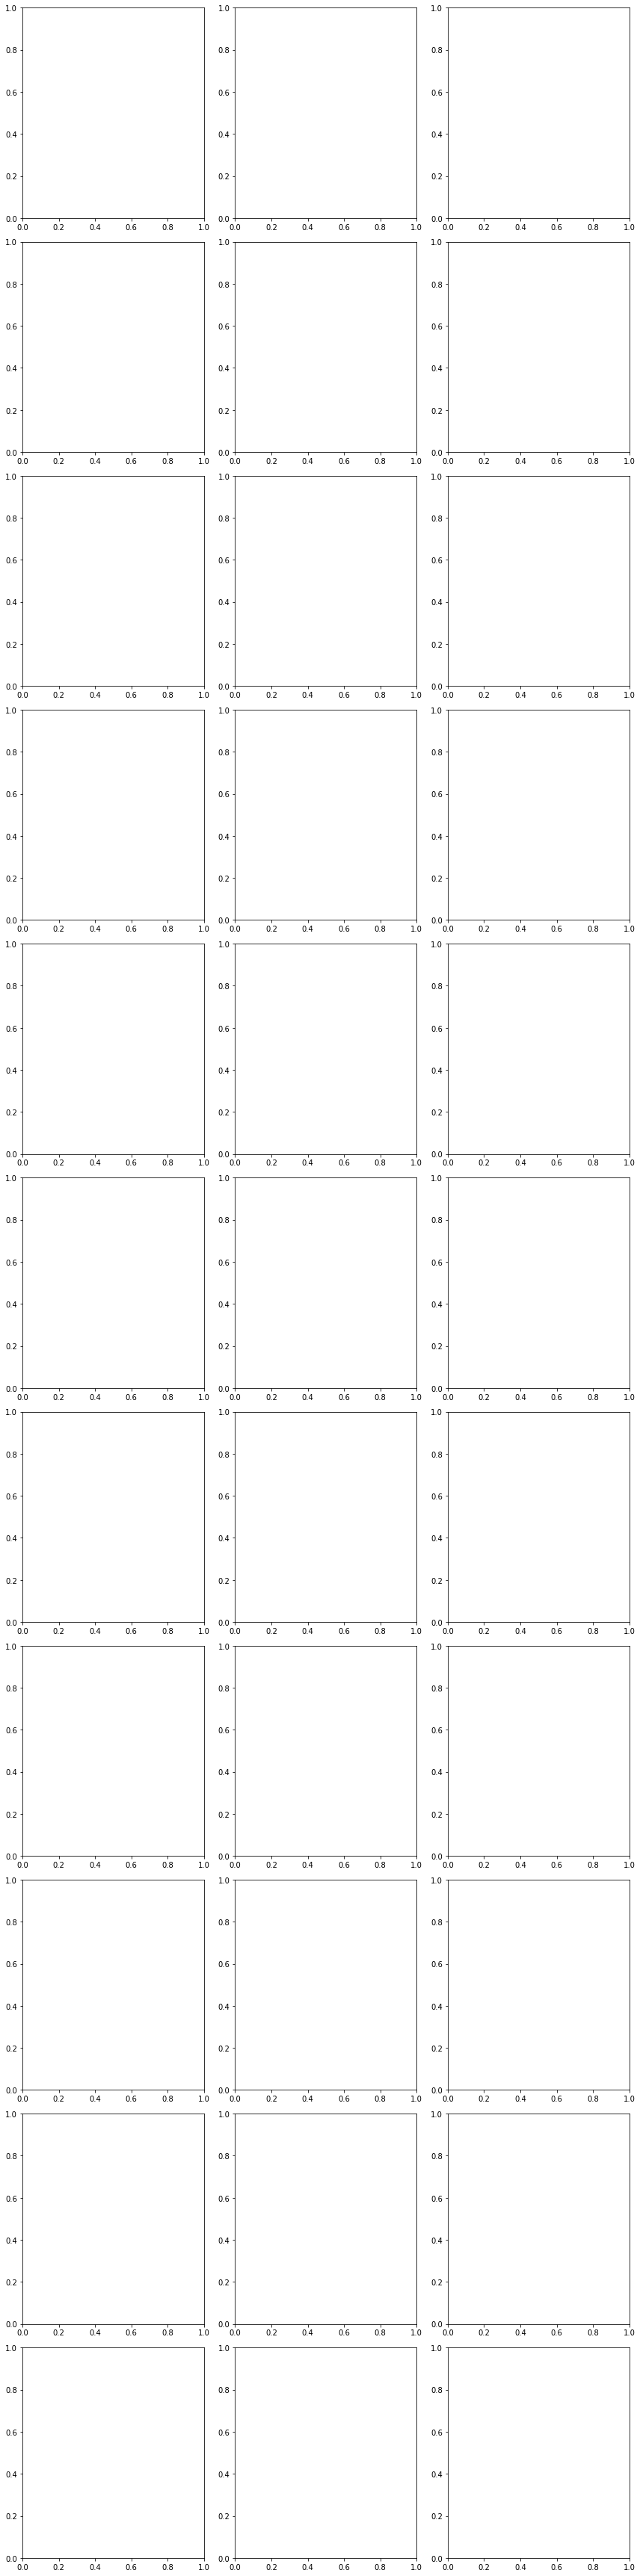

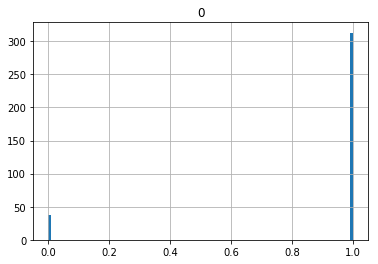

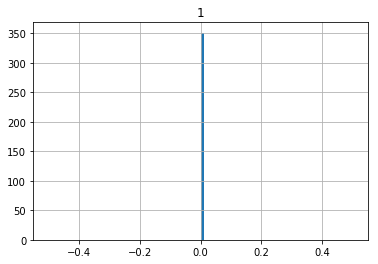

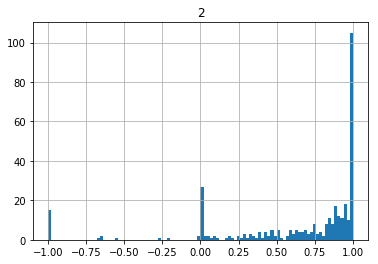

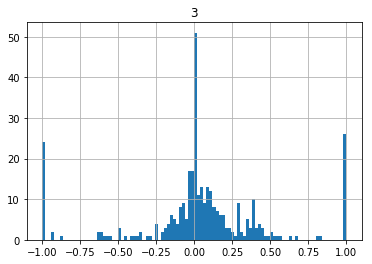

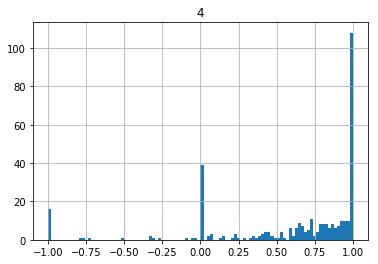

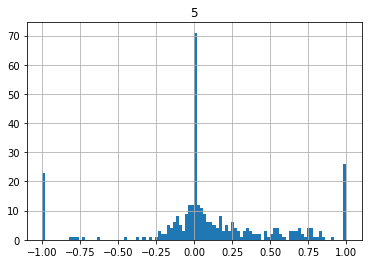

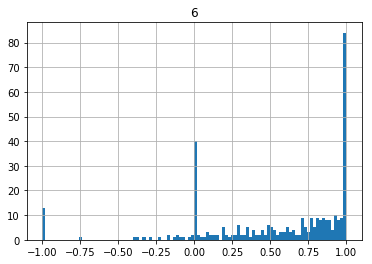

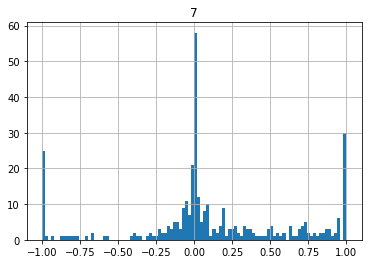

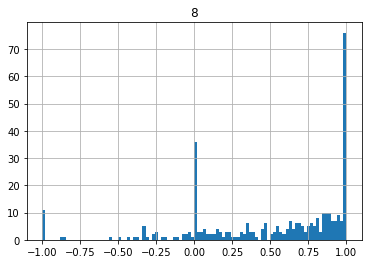

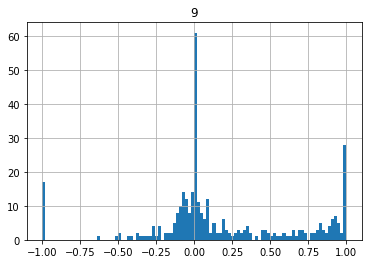

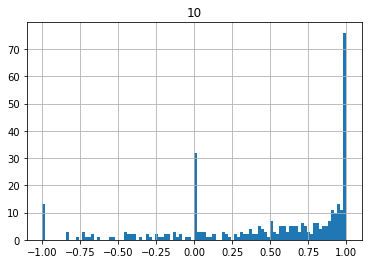

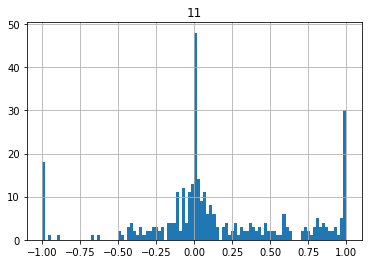

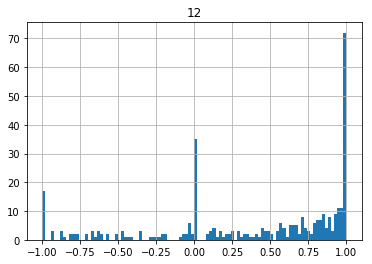

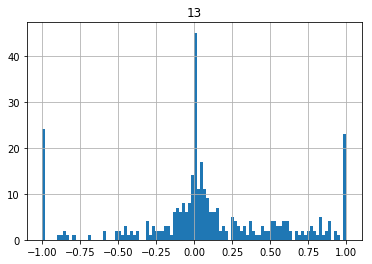

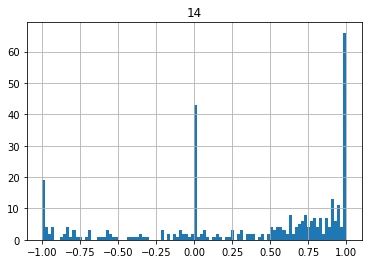

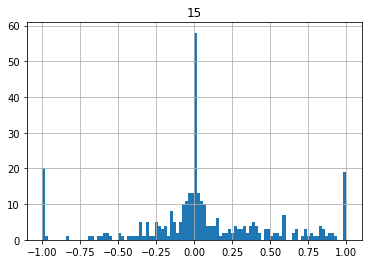

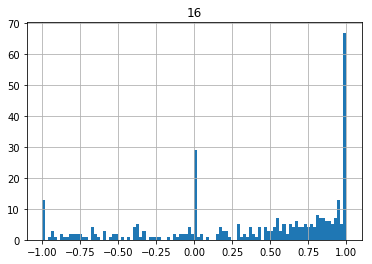

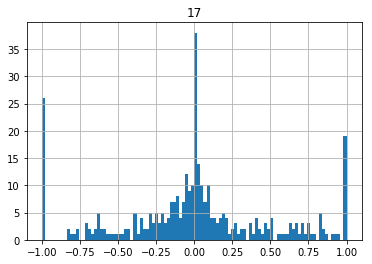

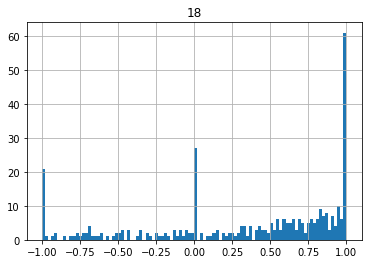

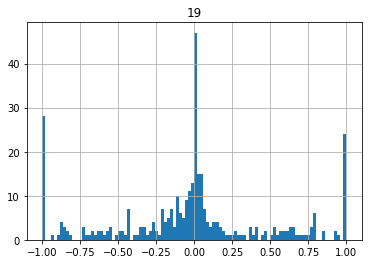

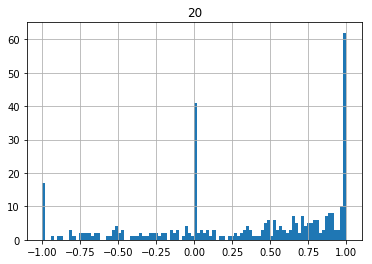

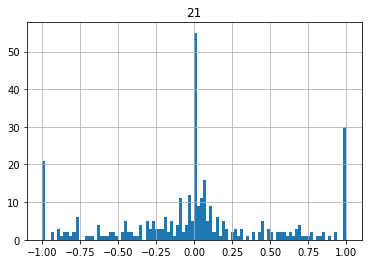

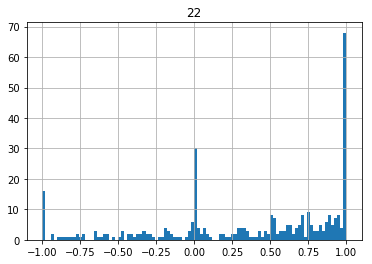

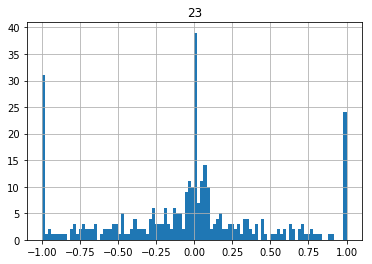

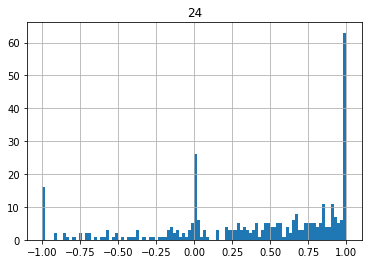

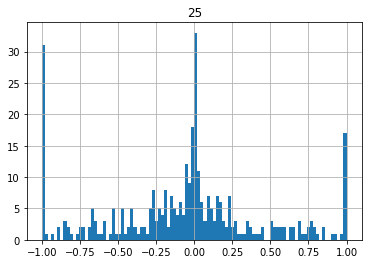

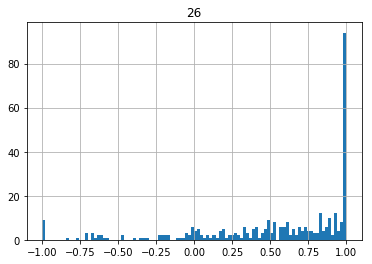

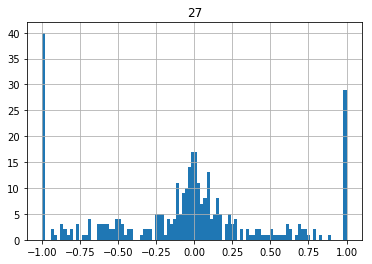

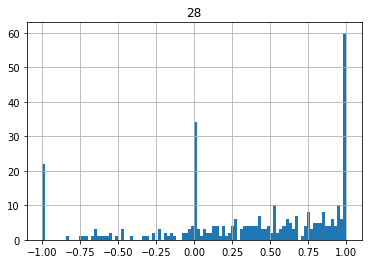

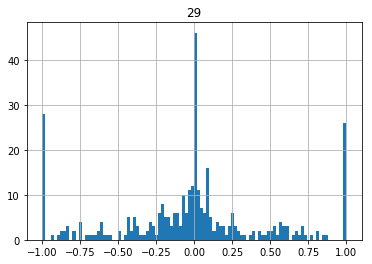

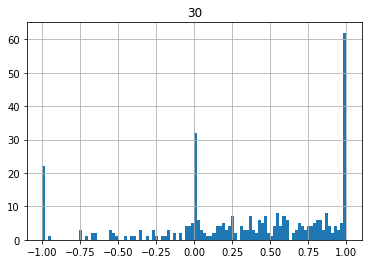

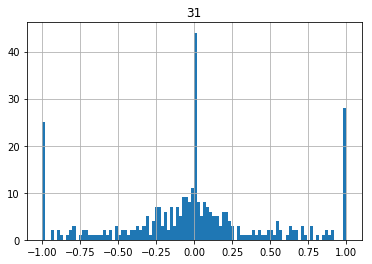

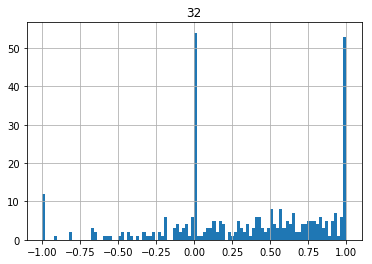

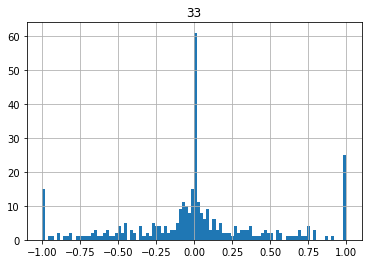

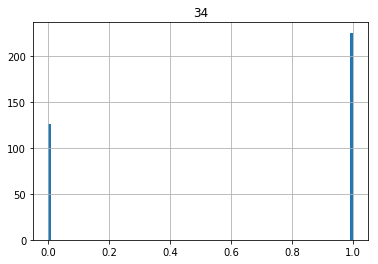

In [18]:
fig, axes = plt.subplots(len(df.columns) // 3, 3, figsize=(12, 48))
for x in df.columns:
    df.hist(column = x, bins = 100)

fig.tight_layout()

In [25]:
#normalizing dataframe
column_maxes = df.max()
df_max = column_maxes.max()
norm_df = df / df_max

In [33]:
#Train test split
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference([34])], df[34], random_state=42 , train_size=0.8)
len(xTrain) , len(xTest)

(280, 71)

## 1. Classification baseline

Using Logistic Regression of sklearn, run a grid search on parameter C from the values [0.01, 0.1, 1., 10, 100]. Select the best model by running 5 Fold cross validation on train set according to f1 score.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
C_list = [0.01, 0.1, 1 , 10 ,100]
for c in C_list:
    LR = LogisticRegression(C=c , solver='lbfgs')
    LR.fit(xTrain, yTrain)
    y_pred = LR.predict(xTest)
    print(f1_score(yTest, y_pred))

#Kvercnenq C= 1 


0.8190476190476191
0.8865979381443299
0.8958333333333334
0.8958333333333334
0.8842105263157894


/home/edgar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## 2. Dimensionality Reduction PCA

1. Project data to dimension $K_1$ so that total explained variance ratio is $\geq$0.9
2. Project data to dimension $K_2$ so that total explained variance ratio is $\geq$0.99
3. Train Logistic Regression with the best C from task $\bf 1$ on projected data that you got in $\bf 2.1$ and $\bf 2.2$
4. Compare Jaccard Index and F1 score of the three models.
5. Investigate the learned coefficients of best model that you found in $\bf 1$, make two training sets by selecting $K_1$, $K_2$ most important features.
6. Train Logistic Regression with the best C from task $\bf 1$ on datasets that you made in $\bf 2.5$, and compare Jaccard Index and F1 score with respective models from $\bf 2.3$

In [70]:
from sklearn.decomposition import PCA
for comp in range(32):
    pca = PCA(n_components = comp , svd_solver='full')
    pca.fit(xTrain)
    print('n_components:' , comp  , 'Variance_ratio:' , sum(pca.explained_variance_ratio_)) 
    
#k1 = 18 , k2 = 30

n_components: 0 Variance_ratio: 0
n_components: 1 Variance_ratio: 0.3081573126420471
n_components: 2 Variance_ratio: 0.4317938783623041
n_components: 3 Variance_ratio: 0.5043372250752413
n_components: 4 Variance_ratio: 0.5734043534484552
n_components: 5 Variance_ratio: 0.6187676428342826
n_components: 6 Variance_ratio: 0.6598927241451163
n_components: 7 Variance_ratio: 0.6913983415304232
n_components: 8 Variance_ratio: 0.7222765200277576
n_components: 9 Variance_ratio: 0.7494733152627118
n_components: 10 Variance_ratio: 0.7736462858142846
n_components: 11 Variance_ratio: 0.7958069694424846
n_components: 12 Variance_ratio: 0.81470675336499
n_components: 13 Variance_ratio: 0.8332863230331253
n_components: 14 Variance_ratio: 0.8500617396126661
n_components: 15 Variance_ratio: 0.8661786153530632
n_components: 16 Variance_ratio: 0.8804823789248929
n_components: 17 Variance_ratio: 0.893264637322377
n_components: 18 Variance_ratio: 0.9055963634906903
n_components: 19 Variance_ratio: 0.9166814

In [93]:
pca = PCA(n_components=18, svd_solver='full')
pca.fit(xTrain)
xTrain_pca = pca.transform(xTrain)
pca.fit(xTest)
xTest_pca = pca.transform(xTest)



LR = LogisticRegression(C=1, solver='lbfgs')
LR.fit(xTrain_pca, yTrain)
y_pred = LR.predict(xTest_pca)
f1_score(y_pred, yTest)


0.8791208791208791

In [109]:
pca = PCA(n_components=30, svd_solver='full')
pca.fit(xTrain)
xTrain_pca = pca.transform(xTrain)
pca.fit(xTest)
xTest_pca = pca.transform(xTest)



LR = LogisticRegression(C=1, solver='lbfgs')
LR.fit(xTrain_pca, yTrain)
y_pred = LR.predict(xTest_pca)
f1_score(y_pred, yTest)

0.9111111111111112

## 3. Dimensionality Reduction LDA

1. Project data to dimension $K_1$ so that total explained variance ratio is $\geq$0.9
2. Project data to dimension $K_2$ so that total explained variance ratio is $\geq$0.99
3. Train Logistic Regression with the best C from task $\bf 1$ on projected data that you got in $\bf 3.1$ and $\bf 3.2$
4. Compare Jaccard Index and F1 score with the previous models in tasks $\bf 1$ and $\bf 2$.
5. Investigate the learned coefficients of best model that you found in $\bf 1$, make two training sets by selecting $K_1$, $K_2$ most important features.
6. Train Logistic Regression with the best C from task $\bf 1$ on datasets that you made in $\bf 3.5$, and compare Jaccard Index and F1 score with respective models from $\bf 3.3$

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components = 18)
LDA.fit(xTrain, yTrain)
xTrain_LDA = LDA.transform(xTrain)
xTrain.shape , xTrain_LDA.shape

/home/edgar/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


((280, 34), (280, 1))

## 4. 2D plots

Make 4 plots
1. Select 2 most important features of the best Logistic Regression model from task $\bf 1$. Make scatter plot using these two features, and color according to target variable.
2. Select first two principal components from task $\bf 2.2$.Make scatter plot using these two components, and color according to target variable.
3. Select first two linear discriminant components from task $\bf 3.2$.Make scatter plot using these two components, and color according to target variable.
4. Project data to 2D space and plot it, again by coloring according to target variable.